# Semantics and Pragmatics, KIK-LG103

## Lab session 3, Part 1

---

In this lab session we will work on distributional semantics. Our main focus is on trying to build up understanding and intuition of the concept of *meaning as an embedding in a vector space*.

In the second lecture the first step towards word embeddings was *semantic feature analysis*. In semantic feature analysis we try to find a minimal set of (binary) features which we can use to discriminate between the meanings of the words. Let's start this session with the same idea. 

First of all, run the cell below to import the library `plot_utils` for plotting our embeddings and to set a variable which controls how the figures are displayed.

In [4]:
import sys
sys.path.append("../../src")
import plot_utils

%matplotlib notebook

### Section 1.1: Semantic feature analysis in three dimensions

---

Below you can see an example of semantic feature analysis (from slide 9).

The dictionary `features` contains the names of the features we want to use, linked to their respective axes *x*, *y*, and *z*. The feature names are only used for visualization.

Next we define a list of words with their analyses. Each word is represented as a *tuple* `(word, features)`. Don't worry too much about what a tuple is (you can think of it simply as a list); you only need to remember the syntax. 

The word is a string as always, and the features are represented as a list of integers (`[x, y, z]`). Our semantic features are binary, so let's use 1 for *positive*, -1 for *negative*, and 0 for *undefined*.

Finally, the function `plot_3d_binary` plots the word vectors.

Run the cell and inspect the output. Can you find any meaningful or interesting relations between the word vectors (their angles)? For example, how do the two groups (cow, bull, calf) and (woman, man, child) relate to each other?

**NOTE:** *The figure should be dynamic (you should be able to rotate it etc.) If it is static, run the cell above with the line `%matplotlib notebook` again and it should work.*

<IPython.core.display.Javascript object>


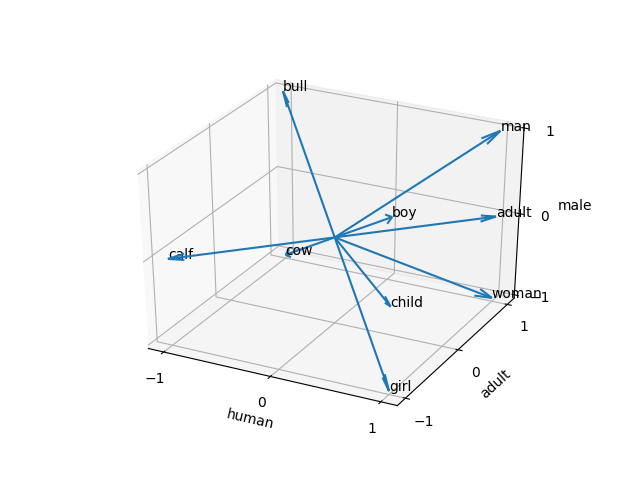

In [5]:
features = {
    "x": "human",
    "y": "adult",
    "z": "male"
}

# Features are binary; 0 means 'not defined'
words = [
    ("child", [ 1, -1,  0]),
    ("girl",  [ 1, -1, -1]),
    ("boy",   [ 1, -1,  1]),
    ("adult", [ 1,  1,  0]),
    ("woman", [ 1,  1, -1]),
    ("man",   [ 1,  1,  1]),
    ("calf",  [-1, -1,  0]),
    ("bull",  [-1,  1,  1]),
    ("cow",   [-1,  1, -1])
]

plot_utils.plot_3d_binary(features, words)

---

**Ex 1.1.1** In the code cell below, analyze and visualize some other set of words using **three** features of your choice. Three features is not a lot, but do your best. We will use more features in the next section.

Use a reasonable number of words (for example 6 or more).

Remember to define the features for each word in the *same order*. That is, the order should be `[x, y, z]` for all words. Otherwise the output might not make a lot of sense.

---

<IPython.core.display.Javascript object>


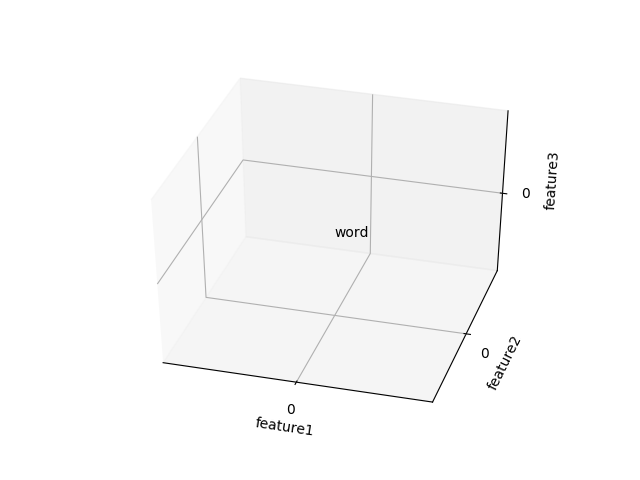

In [6]:
# Define your own features here. Only change the 'featureN' part
# to reflect the feature you are using.
features = {
    "x": "feature1",
    "y": "feature2",
    "z": "feature3"
}

# Define your words and their feature vectors here
words = [
    ("word", [0, 0, 0]) 
]

plot_utils.plot_3d_binary(features, words)

### Section 1.2: Semantic feature analysis with more features

---

The restriction on the number of features to three is clearly too strict. In reality we need many more features to fully analyze even a small number of words. In this section we get rid of this limitation.

Below you can see an example from the slides again (slide 10). In this case we have 7 features (*individual*, *team*, *indoors*, *outdoors*, *board game*, *card game*, *kid's game*). Consequently the embeddings (vectors) reside in a 7-dimensional vector space. 

As you might imagine, visualizing 7-dimensional vectors requires some extra work. In the slides we quickly heard about *dimensionality reduction*. In this example, we reduce the dimensionality of the data to 2 or 3 dimensions, so that we can plot it using conventional methods. It suffices to say here that the dimensionality reduction method we use is **Principal component analysis** (PCA). 

*If you are interested, you can read more about PCA [in this visual explanation](http://setosa.io/ev/principal-component-analysis/) or in [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis). This is completely optional and beyond the scope of this course. Especially the Wikipedia article requires substantial mathematical knowledge.*

Because the dimensionality of the original vectors is high and we need to perform PCA on them, the final 2 or 3 dimensions do not necessarily correlate to any of our original features. Because of this, we cannot name the axes in the figures anymore, and so the function we use in this section doesn't require the `features` dictionary as an argument. 

The functions we use here are `plot_2d_binary_hd` and `plot_3d_binary_hd` (`hd` for high-dimensional). The `2d` function plots a 2D graph and the `3d` version plots a 3D graph like the one we saw above. In addition, you can control whether the vectors are plotted as dots or arrows using the boolean argument `arrows`.

Again, run the code cell below and inspect the output. Does it make sense?

<IPython.core.display.Javascript object>


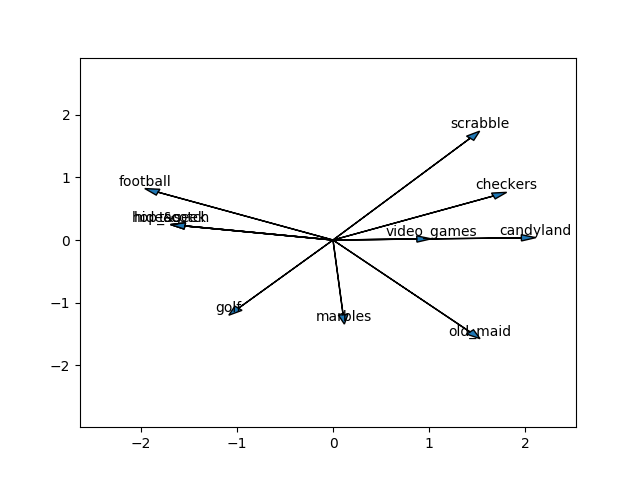

<IPython.core.display.Javascript object>


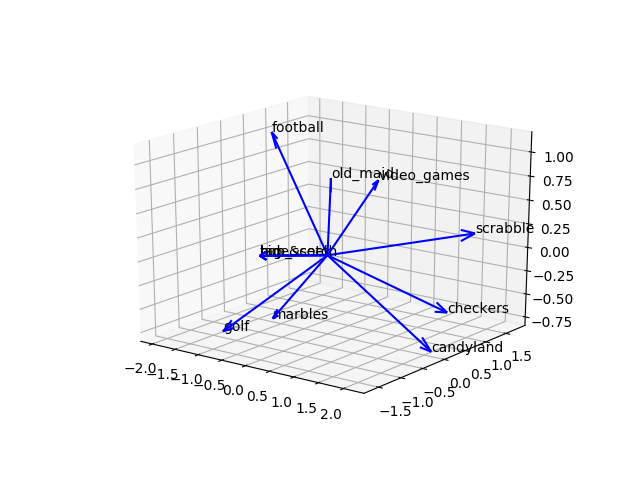

In [8]:
# features: (1) individual, (2) team, (3) indoors, 
#           (4) outdoors, (5) board game,
#           (6) card game, (7) kid's game

words = [         #  (1) (2) (3) (4) (5) (6) (7)
    ("football",    [-1,  1, -1,  1, -1, -1,  0]),
    ("marbles",     [ 1, -1,  1,  1, -1, -1,  1]),
    ("tag",         [ 1,  1, -1,  1, -1, -1,  1]),
    ("hide&seek",   [ 1,  1, -1,  1, -1, -1,  1]),
    ("scrabble",    [ 1,  1,  1, -1,  1, -1,  0]),
    ("candyland",   [ 1, -1,  1, -1,  1, -1,  1]),
    ("video_games", [ 1,  0,  1, -1, -1, -1,  0]),
    ("hop_scotch",  [ 1,  1, -1,  1, -1, -1,  1]),
    ("checkers",    [ 1,  0,  1, -1,  1, -1,  1]),
    ("golf",        [ 1, -1, -1,  1, -1, -1,  1]),
    ("old_maid",    [ 1, -1,  1, -1, -1,  1,  1]),
]

plot_utils.plot_2d_binary_hd(words, arrows=True)
plot_utils.plot_3d_binary_hd(words, arrows=True)

---

**Ex 1.2.1** In the code cell below, analyze and visualize some other set of words using any number (with n > 3) of features of your choice. You can try out different analyses with a variable number of features. Just remember that in a single run all vectors must contain the same number of features.

Use a reasonable number of words (for example 6 or more).

Again, remember to define the features for each word in the *same order*. That is, the order should be `[f1, f2, f3, ..., fn]` for all words. Otherwise the output might not make a lot of sense.

---

In [ ]:
# you can use any number of features here
words = [
    ("word1", [0, 0, 0, 0, 0, 0, 0, 0])
]

plot_utils.plot_2d_binary_hd(words, arrows=False)
plot_utils.plot_3d_binary_hd(words, arrows=True)

You can now move on to part 2.